In [1]:
#Work on lazy approach
#It gives answers by seeing neighbours not by predicting weights
#value of K should be a odd number
#It works by finding Euclidian Distance amoung the points

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
X = df[['Age', 'EstimatedSalary']]

In [8]:
y = df[['Purchased']]

In [9]:
import seaborn as sns
sns.set()

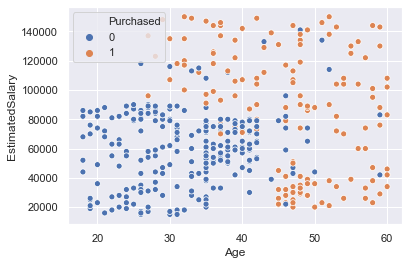

In [10]:
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', data = df, hue = 'Purchased')

#by seeing this we cannot predict one line

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
#Converting Panda values to numpy

X = X.values
y = y.values

In [13]:
type(X)

numpy.ndarray

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier(n_neighbors=1)

#We have to use trial and error which value of k/neighbours fits the best
#We will be creating a fuction to put values of k and gives us the accuracy than we will select which val of k is good

In [18]:
model.fit(X_train, y_train)

C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=1)

In [19]:
y_predict = model.predict(X_test)

In [20]:
y_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, y_predict)

#44 21 are correctly predicted

array([[44,  8],
       [ 7, 21]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score


In [24]:
accuracy_score(y_test, y_predict)

#81% correctly predicted

0.8125

In [25]:
#Creation of function for K

In [26]:
error_rate = []

In [27]:
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    error_rate .append(accuracy_score(y_test, y_predict))


C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda4\e

In [28]:
error_rate

#at K = 5 we got accuracy of 82.5%

[0.8125,
 0.7625,
 0.8,
 0.8,
 0.825,
 0.775,
 0.8125,
 0.775,
 0.7875,
 0.775,
 0.8,
 0.775,
 0.75,
 0.7625,
 0.775,
 0.75,
 0.775,
 0.7625,
 0.7625,
 0.75,
 0.775,
 0.7625,
 0.7625,
 0.7625,
 0.775,
 0.775,
 0.7875,
 0.7875,
 0.8,
 0.775,
 0.8,
 0.8,
 0.7875,
 0.8,
 0.8,
 0.75,
 0.75,
 0.75,
 0.775,
 0.75,
 0.7625,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75]

In [29]:
error_rate1=[]
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    error_rate1 .append(np.mean(y_test !=y_predict))

C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d ar

C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d ar

In [30]:
error_rate1

[0.45875,
 0.41375,
 0.44,
 0.4175,
 0.4475,
 0.425,
 0.43625,
 0.41,
 0.42875,
 0.41,
 0.425,
 0.41,
 0.4175,
 0.41375,
 0.425,
 0.4175,
 0.425,
 0.40625,
 0.41375,
 0.4025,
 0.41,
 0.40625,
 0.41375,
 0.40625,
 0.41,
 0.41,
 0.41375,
 0.41375,
 0.4175,
 0.41,
 0.4175,
 0.4175,
 0.42125,
 0.4175,
 0.4175,
 0.4025,
 0.4025,
 0.4025,
 0.41,
 0.4025,
 0.40625,
 0.4025,
 0.40625,
 0.4025,
 0.4025,
 0.4025,
 0.4025,
 0.4025,
 0.4025]

Text(0, 0.5, 'Error')

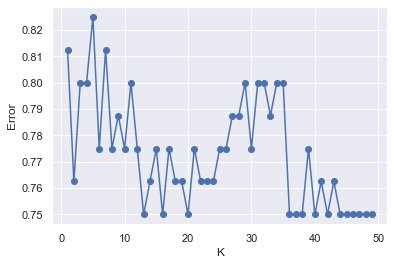

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1,50), error_rate , marker = 'o')
plt.xlabel('K')
plt.ylabel('Error')